# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Jasmein Al-baar Putri Rus'an
- **Email:** jasmeinalbaar29@gmail.com
- **ID Dicoding:** MC222D5X1142

## Menentukan Pertanyaan Bisnis

- Manakah faktor cuaca (suhu, kelembaban, kecepatan angin) paling berpengaruh terhadap jumlah penyewaan sepeda?
- Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan atau hari libur dalam dua tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [37]:
day_df = pd.read_csv('https://raw.githubusercontent.com/jasmeinalbr/Proyek-Analisis-Data/main/Data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [38]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/jasmeinalbr/Proyek-Analisis-Data/main/Data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Tabel penyewaan sepeda yang dikumpulkan berdasarkan hari.
- Tabel penyewaan sepeda yang dikumpulkan berdasarkan jam.

### Assessing Data

#### Menilai tabel `day_df` dan `hour_df`

Tabel `day_df`

In [39]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tabel `hour_df`

In [40]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mengecek missing value

In [41]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [42]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mengecek duplikasi data

In [43]:
print("Jumlah duplikasi data tabel day_df: ", day_df.duplicated().sum())

Jumlah duplikasi data tabel day_df:  0


In [44]:
print("Jumlah duplikasi data tabel hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi data tabel hour_df:  0


Ringkasan parameter statistik

In [45]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [46]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing value.
- Tidak ada duplikasi data.
- Terdapat tipe data yang menurut saya kurang sesuai pada kolom dteday, season, yr, mnth, holiday, weekday, workingday dan weathersit.

### Cleaning Data

Mengubah tipe data pada kolom dteday, season, yr, mnth, holiday, weekday, workingday dan weathersit.

In [47]:
# Mengubah tipe data object menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Mengubah tipe data int menjadi category
columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

Mengubah nama kolom agar lebih mudah dipahami

In [48]:
# Kolom day
day_df.rename(columns={'dteday':'date','yr':'year','mnth':'month','weekday':'day_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count','hum':'humidity'},inplace=True)
# Kolom hour
hour_df.rename(columns={'dteday':'date','yr':'year','hr':'hours','mnth':'month','weekday':'day_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count','hum':'humidity'},inplace=True)

Mengubah isi kolom agar lebih mudah dipahami

In [49]:
# mengubah season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# mengubah year menjadi category: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# mengubah month menjadi category: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# mengubah holiday menjadi category: 1:Yes, 0:No
day_df.holiday.replace((1,0),('Yes','No'), inplace=True)
hour_df.holiday.replace((1,0),('Yes','No'), inplace=True)

# mengubah day_of_week menjadi category: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.day_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.day_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# mengubah workingday menjadi category: 1:Yes, 0:No
day_df.workingday.replace((1,0),('Yes','No'), inplace=True)
hour_df.workingday.replace((1,0),('Yes','No'), inplace=True)

# mengubah weather_situation menjadi angka category: 1:Clear, 2:Misty, 3:Light_Rain_or_Snow 4:Heavy_Rain_or_Snow
day_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rain_or_snow','Heavy_rain_or_snow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rain_or_snow','Heavy_rain_or_snow'), inplace=True)

# menghitung humidity agar lebih mudah dipahami dan dianalisis
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100

# menghitung temp agar lebih mudah dipahami dan dianalisis
day_df["temp"] = day_df["temp"] * 41
hour_df["temp"] = hour_df["temp"] * 41

# menghitung atemp agar lebih mudah dipahami dan dianalisis
day_df["atemp"] = day_df["atemp"] * 50
hour_df["atemp"] = hour_df["atemp"] * 50

# menghitung wind_speed agar lebih mudah dipahami dan dianalisis
day_df["wind_speed"] = day_df["wind_speed"] * 67
hour_df["wind_speed"] = hour_df["wind_speed"] * 67

/var/folders/pv/hl8lt53s3212m50jmr0nb5q00000gp/T/ipykernel_12483/2322818834.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
/var/folders/pv/hl8lt53s3212m50jmr0nb5q00000gp/T/ipykernel_12483/2322818834.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename

In [50]:
day_df.head()

,instant,date,season,year,month,holiday,day_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,No,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [51]:
hour_df.head()

,instant,date,season,year,month,hours,holiday,day_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,No,Saturday,No,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No,Saturday,No,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No,Saturday,No,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No,Saturday,No,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No,Saturday,No,Clear,9.84,14.395,75.0,0.0,0,1,1


**Insight:**
- Menghapus kolom yang sekiranya tidak akan dibutuhkan agar mudah mengelolanya
- Mengubah tipe data menjadi lebih sesuai agar mudah diolah
- Mengubah nama kolom agar lebih mudah dibaca
- Mengubah isi kolom agar nilainya mudah dipahami dan dibaca

## Exploratory Data Analysis (EDA)

### Explore Tabel `day_df` dan `hour_df`

In [52]:
day_df.describe(include="all")

,instant,date,season,year,month,holiday,day_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jan,No,Sunday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [53]:
hour_df.describe(include="all")

,instant,date,season,year,month,hours,holiday,day_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,May,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


Kita coba fokuskan parameter statistik pada faktor cuaca (suhu, kelembaban, dan kecepatan angin) dan total penyewaan sepeda.

In [54]:
print(day_df[['temp', 'humidity', 'wind_speed', 'count']].describe())
print(hour_df[['temp', 'humidity', 'wind_speed', 'count']].describe())

             temp    humidity  wind_speed        count
count  731.000000  731.000000  731.000000   731.000000
mean    20.310776   62.789406   12.762576  4504.348837
std      7.505091   14.242910    5.192357  1937.211452
min      2.424346    0.000000    1.500244    22.000000
25%     13.820424   52.000000    9.041650  3152.000000
50%     20.431653   62.666700   12.125325  4548.000000
75%     26.872076   73.020850   15.625371  5956.000000
max     35.328347   97.250000   34.000021  8714.000000
               temp      humidity    wind_speed         count
count  17379.000000  17379.000000  17379.000000  17379.000000
mean      20.376474     62.722884     12.736540    189.463088
std        7.894801     19.292983      8.196795    181.387599
min        0.820000      0.000000      0.000000      1.000000
25%       13.940000     48.000000      7.001500     40.000000
50%       20.500000     63.000000     12.998000    142.000000
75%       27.060000     78.000000     16.997900    281.000000
max      

**Insight:**
- Suhu rata-rata sekitar 34°C.
- Kelembaban cukup tinggi, sekitar 62-63%.
- Jumlah penyewaan sepeda rata-rata 189 per jam dan 4504 per hari

Selanjutnya kita lihat korelasi atau hubungan antara variabel.

In [55]:
print(day_df[['temp', 'humidity', 'wind_speed', 'count']].corr())
print(hour_df[['temp', 'humidity', 'wind_speed', 'count']].corr())

                temp  humidity  wind_speed     count
temp        1.000000  0.126963   -0.157944  0.627494
humidity    0.126963  1.000000   -0.248489 -0.100659
wind_speed -0.157944 -0.248489    1.000000 -0.234545
count       0.627494 -0.100659   -0.234545  1.000000
                temp  humidity  wind_speed     count
temp        1.000000 -0.069881   -0.023125  0.404772
humidity   -0.069881  1.000000   -0.290105 -0.322911
wind_speed -0.023125 -0.290105    1.000000  0.093234
count       0.404772 -0.322911    0.093234  1.000000


**Insight:**
- Suhu berpengaruh positif terhadap penyewaan sepeda (semakin panas, semakin banyak penyewa).
- Kelembaban menghasilkan negatif terhadap penyewaan sepeda, artinya tidak terlalu mempengaruhi penyewa sepeda.
- Kecepatan angin juga tidak terlalu berpengaruh terhadap jumlah penyewaan.

Eksplorasi Data Hari Kerja vs Akhir Pekan/Hari Libur

In [56]:
# Jumlah penyewaan sepeda berdasarkan hari kerja dan akhir pekan
print(day_df.groupby('workingday')['count'].describe())

# Jumlah penyewaan sepeda berdasarkan hari libur (holiday)
print(day_df.groupby('holiday')['count'].describe())

# Jumlah penyewaan sepeda berdasarkan hari dalam seminggu
print(day_df.groupby('day_of_week')['count'].describe())

            count         mean          std    min      25%     50%     75%  \
workingday                                                                    
No          231.0  4330.168831  2052.141245  605.0  2710.50  4459.0  5907.5   
Yes         500.0  4584.820000  1878.415583   22.0  3344.25  4582.0  5987.5   

               max  
workingday          
No          8714.0  
Yes         8362.0  
         count         mean          std     min     25%     50%      75%  \
holiday                                                                     
No       710.0  4527.104225  1929.013947    22.0  3214.0  4558.0  5932.75   
Yes       21.0  3735.000000  2103.350660  1000.0  1951.0  3351.0  6034.00   

            max  
holiday          
No       8714.0  
Yes      7403.0  
             count         mean          std     min      25%     50%  \
day_of_week                                                             
Sunday       105.0  4228.828571  1872.496629   605.0  2918.00  4334.0   

/var/folders/pv/hl8lt53s3212m50jmr0nb5q00000gp/T/ipykernel_12483/3621579060.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(day_df.groupby('workingday')['count'].describe())
/var/folders/pv/hl8lt53s3212m50jmr0nb5q00000gp/T/ipykernel_12483/3621579060.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(day_df.groupby('holiday')['count'].describe())
/var/folders/pv/hl8lt53s3212m50jmr0nb5q00000gp/T/ipykernel_12483/3621579060.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or o

**Insight:**
- Hari kerja (workingday = Yes) memiliki jumlah penyewaan yang lebih tinggi dibanding akhir pekan.
- Hari libur (holiday = Yes) memiliki jumlah penyewaan yang lebih rendah dari hari biasa.
- Penyewaan sepeda cenderung lebih tinggi di hari kerja (Senin–Jumat) dibanding akhir pekan.

Penyewaan sepeda berdasarkan jam dalam sehari pada hari kerja dan akhir pekan

In [57]:
# hari kerja atau weekend
print(hour_df.groupby(['workingday', 'hours'])['count'].mean())
# hari libur
print(hour_df.groupby(['holiday', 'hours'])['count'].mean())

/var/folders/pv/hl8lt53s3212m50jmr0nb5q00000gp/T/ipykernel_12483/1647356005.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(hour_df.groupby(['workingday', 'hours'])['count'].mean())


workingday  hours
No          0         90.800000
            1         69.508696
            2         53.171053
            3         25.775330
            4          8.264317
            5          8.689189
            6         18.742358
            7         43.406926
            8        105.653680
            9        171.623377
            10       255.909091
            11       315.316017
            12       366.259740
            13       372.731602
            14       364.645022
            15       358.813853
            16       352.727273
            17       323.549784
            18       281.056522
            19       231.673913
            20       174.739130
            21       142.060870
            22       116.060870
            23        85.930435
Yes         0         36.786290
            1         16.552632
            2          8.683778
            3          4.942553
            4          5.429787
            5         24.913131
            6        1

/var/folders/pv/hl8lt53s3212m50jmr0nb5q00000gp/T/ipykernel_12483/1647356005.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(hour_df.groupby(['holiday', 'hours'])['count'].mean())


**Insight:**
- Pada hari kerja (workingday=Yes), terjadi dua puncak penggunaan sepeda: pagi (sekitar jam 8) dan sore (sekitar jam 17-18).
- Pada akhir pekan (workingday=No), pola penggunaan lebih merata sepanjang hari, dengan puncak di siang hari.
- Hari libur memiliki pola penyewaan yang lebih stabil, dengan puncak penyewaan pertengahan hari (10:00 - 15:00).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Manakah faktor cuaca (suhu, kelembaban, kecepatan angin) paling berpengaruh terhadap jumlah penyewaan sepeda?

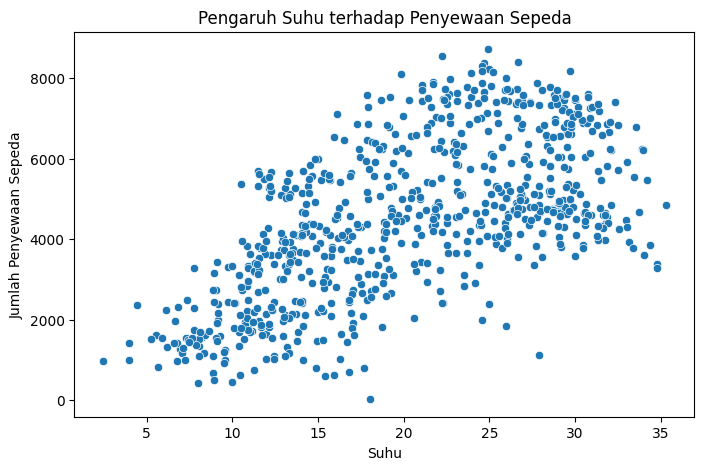

In [58]:
# Scatter plot suhu vs jumlah penyewaan sepeda
plt.figure(figsize=(8,5))
sn.scatterplot(x=day_df['temp'], y=day_df['count'])
plt.title("Pengaruh Suhu terhadap Penyewaan Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

Terlihat plot menunjukkan tren naik, maka semakin tinggi suhu, semakin banyak penyewaan sepeda.

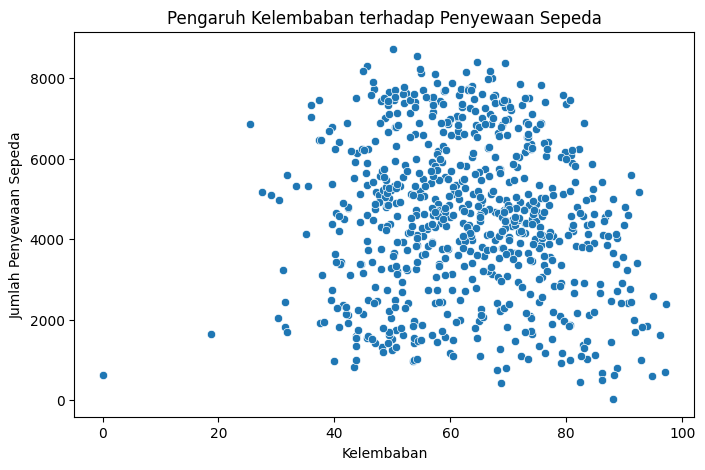

In [59]:
# Scatter plot kelembaban vs jumlah penyewaan sepeda
plt.figure(figsize=(8,5))
sn.scatterplot(x=day_df['humidity'], y=day_df['count'])
plt.title("Pengaruh Kelembaban terhadap Penyewaan Sepeda")
plt.xlabel("Kelembaban")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

Terlihat bahwa tidak ada pola yang jelas, artinya kelembaban tidak terlalu berpengaruh terhadap penyewaan sepeda.

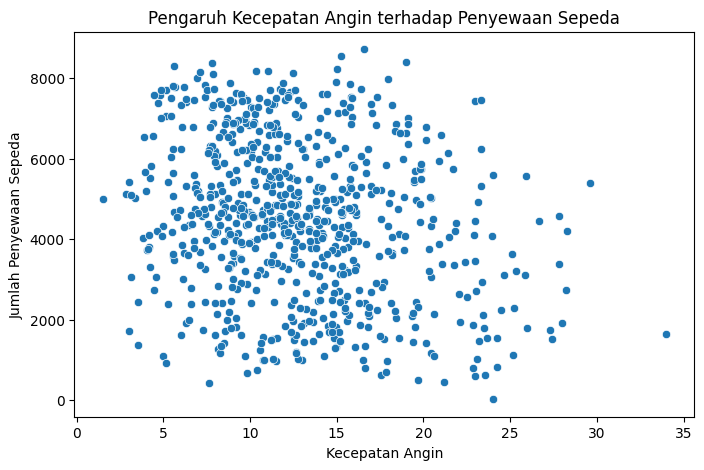

In [60]:
# Scatter plot kecepatan angin vs jumlah penyewaan sepeda
plt.figure(figsize=(8,5))
sn.scatterplot(x=day_df['wind_speed'], y=day_df['count'])
plt.title("Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda")
plt.xlabel("Kecepatan Angin")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

Terlihat bahwa tidak ada pola yang jelas, artinya kecepatan angin tidak terlalu berpengaruh terhadap penyewaan sepeda.

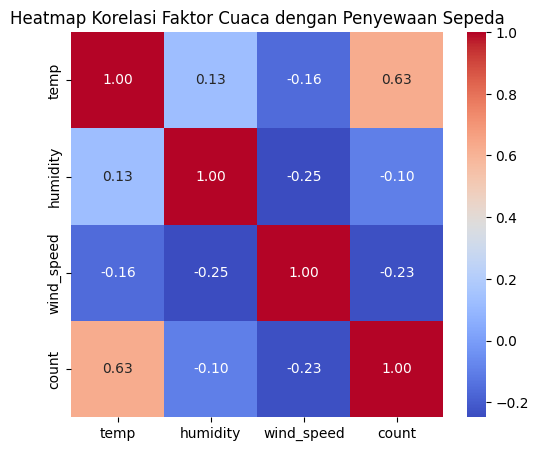

In [61]:
plt.figure(figsize=(6,5))
sn.heatmap(day_df[['temp', 'humidity', 'wind_speed', 'count']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Faktor Cuaca dengan Penyewaan Sepeda")
plt.show()

Nilai korelasi faktor cuaca pada penyewaan sepeda dalam bentuk heatmap

/var/folders/pv/hl8lt53s3212m50jmr0nb5q00000gp/T/ipykernel_12483/3263728019.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')


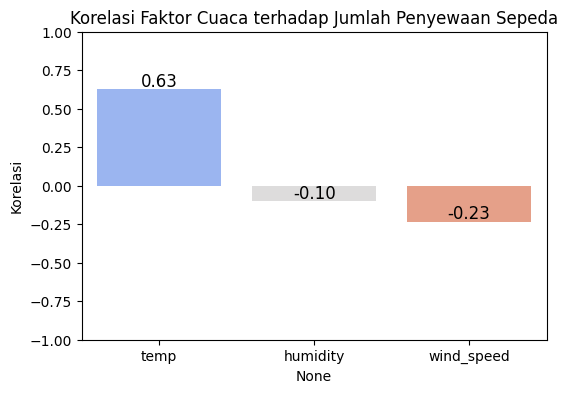

In [62]:
# Menghitung korelasi faktor cuaca dengan jumlah penyewaan sepeda
correlation = day_df[['temp', 'humidity', 'wind_speed', 'count']].corr()['count'].drop('count')

# Visualisasi dalam bentuk bar chart
plt.figure(figsize=(6,4))
sn.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')

# Menambahkan nilai korelasi di atas bar
for i, v in enumerate(correlation.values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.title("Korelasi Faktor Cuaca terhadap Jumlah Penyewaan Sepeda")
plt.ylabel("Korelasi")
plt.ylim(-1, 1)  # Korelasi berkisar dari -1 hingga 1
plt.show()

**Insight:**
- Jika nilai korelasi 1 atau positif maka variabel tersebut berpengaruh terhadap penyewaan sepeda.
- Jika nilai korelasi -1 atau negatid maka variabel tersebut tidak terlalu berpengaruh atau berlawanan dengan penyewaan sepeda.

Maka seperti pada grafik terlihat bahwa temp atau suhu merupakan variabel paling berpengaruh dari semua faktor cuaca terhadap jumlah penyewaan sepeda.

### Pertanyaan 2: Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan atau hari libur dalam dua tahun terakhir?

/var/folders/pv/hl8lt53s3212m50jmr0nb5q00000gp/T/ipykernel_12483/586067228.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_of_week_rentals = day_df.groupby('day_of_week')['count'].mean().reindex([
/var/folders/pv/hl8lt53s3212m50jmr0nb5q00000gp/T/ipykernel_12483/586067228.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=day_of_week_rentals.index, y=day_of_week_rentals.values, palette=colors)


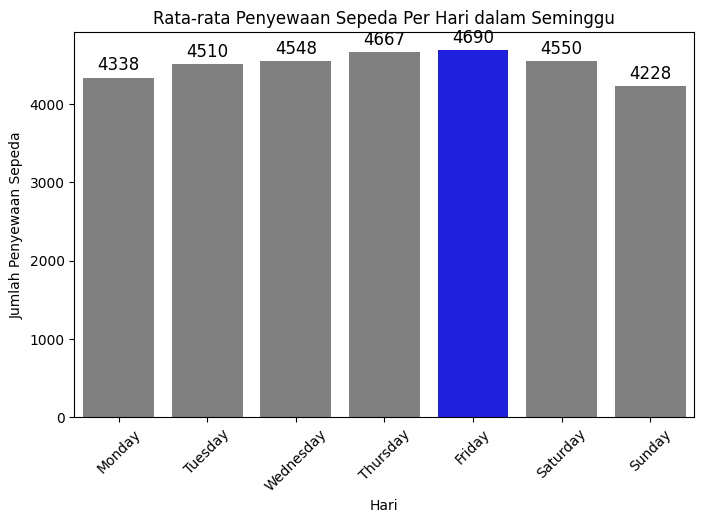

In [63]:
plt.figure(figsize=(8,5))

# Menghitung rata-rata jumlah penyewaan berdasarkan hari dalam seminggu
day_of_week_rentals = day_df.groupby('day_of_week')['count'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Menentukan warna (biru untuk nilai tertinggi, abu-abu untuk lainnya)
colors = ['blue' if v == day_of_week_rentals.max() else 'grey' for v in day_of_week_rentals.values]

# Membuat bar chart
sn.barplot(x=day_of_week_rentals.index, y=day_of_week_rentals.values, palette=colors)

# Menambahkan angka di atas setiap bar
for i, v in enumerate(day_of_week_rentals.values):
    plt.text(i, v + 100, f"{int(v)}", ha='center', fontsize=12)

plt.title("Rata-rata Penyewaan Sepeda Per Hari dalam Seminggu")
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(rotation=45)
plt.show()

/var/folders/pv/hl8lt53s3212m50jmr0nb5q00000gp/T/ipykernel_12483/1847268804.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  working_vs_weekend = day_df.groupby('workingday')['count'].mean()
/var/folders/pv/hl8lt53s3212m50jmr0nb5q00000gp/T/ipykernel_12483/1847268804.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Kategori', y='Jumlah Penyewaan', data=data, palette=colors)


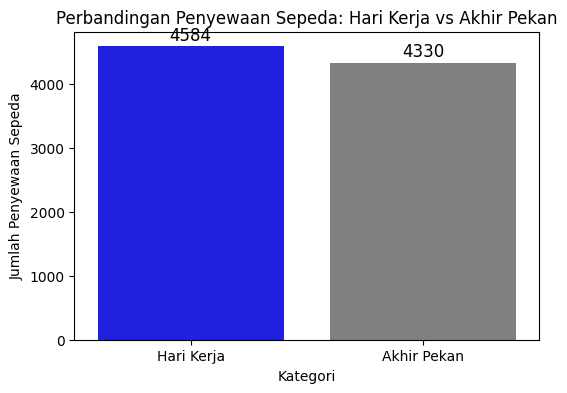

In [64]:
plt.figure(figsize=(6,4))

# Menghitung rata-rata jumlah penyewaan pada hari kerja dan akhir pekan
working_vs_weekend = day_df.groupby('workingday')['count'].mean()

# Membuat DataFrame untuk mempermudah visualisasi
data = pd.DataFrame({
    'Kategori': ['Hari Kerja', 'Akhir Pekan'],
    'Jumlah Penyewaan': [working_vs_weekend['Yes'], working_vs_weekend['No']]
})

# Menentukan warna (biru untuk nilai tertinggi)
colors = ['blue' if v == max(data['Jumlah Penyewaan']) else 'grey' for v in data['Jumlah Penyewaan']]

# Membuat bar chart
sn.barplot(x='Kategori', y='Jumlah Penyewaan', data=data, palette=colors)

# Menambahkan angka di atas setiap bar
for i, v in enumerate(data['Jumlah Penyewaan']):
    plt.text(i, v + 100, f"{int(v)}", ha='center', fontsize=12)

plt.title("Perbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

/var/folders/pv/hl8lt53s3212m50jmr0nb5q00000gp/T/ipykernel_12483/1142249407.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_rentals = day_df.groupby('holiday')['count'].mean()
/var/folders/pv/hl8lt53s3212m50jmr0nb5q00000gp/T/ipykernel_12483/1142249407.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Kategori', y='Jumlah Penyewaan', data=data, palette=colors)


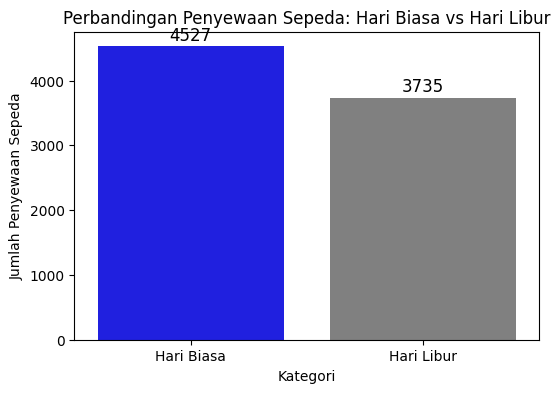

In [65]:
plt.figure(figsize=(6,4))

# Menghitung rata-rata jumlah penyewaan pada hari biasa dan hari libur
holiday_rentals = day_df.groupby('holiday')['count'].mean()

# Membuat DataFrame untuk mempermudah visualisasi
data = pd.DataFrame({
    'Kategori': ['Hari Biasa', 'Hari Libur'],
    'Jumlah Penyewaan': [holiday_rentals['No'], holiday_rentals['Yes']]
})

# Menentukan warna (biru untuk nilai tertinggi)
colors = ['blue' if v == max(data['Jumlah Penyewaan']) else 'grey' for v in data['Jumlah Penyewaan']]

# Membuat bar chart
sn.barplot(x='Kategori', y='Jumlah Penyewaan', data=data, palette=colors)

# Menambahkan angka di atas setiap bar
for i, v in enumerate(data['Jumlah Penyewaan']):
    plt.text(i, v + 100, f"{int(v)}", ha='center', fontsize=12)

plt.title("Perbandingan Penyewaan Sepeda: Hari Biasa vs Hari Libur")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

/var/folders/pv/hl8lt53s3212m50jmr0nb5q00000gp/T/ipykernel_12483/2305083901.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_pattern = hour_df.groupby(['workingday', 'hours'])['count'].mean().reset_index()
/var/folders/pv/hl8lt53s3212m50jmr0nb5q00000gp/T/ipykernel_12483/2305083901.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_pattern = hour_df.groupby(['holiday', 'hours'])['count'].mean().reset_index()


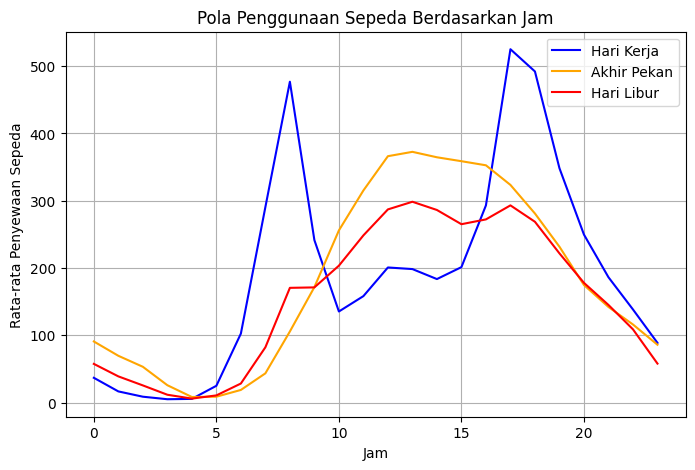

In [66]:
plt.figure(figsize=(8,5))

# Menghitung rata-rata penyewaan berdasarkan jam untuk hari kerja, akhir pekan, dan hari libur
hourly_pattern = hour_df.groupby(['workingday', 'hours'])['count'].mean().reset_index()
holiday_pattern = hour_df.groupby(['holiday', 'hours'])['count'].mean().reset_index()

# Plot hari kerja
sn.lineplot(data=hourly_pattern[hourly_pattern['workingday'] == 'Yes'], x='hours', y='count', label="Hari Kerja", color='blue')
# Plot akhir pekan
sn.lineplot(data=hourly_pattern[hourly_pattern['workingday'] == 'No'], x='hours', y='count', label="Akhir Pekan", color='orange')
# Plot hari libur
sn.lineplot(data=holiday_pattern[holiday_pattern['holiday'] == 'Yes'], x='hours', y='count', label="Hari Libur", color='red')

plt.title("Pola Penggunaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.legend()
plt.grid()
plt.show()

**Insight:**
- Hari dengan penyewaan tertinggi berwarna biru.
- Hari kerja memiliki rata-rata penyewaan lebih tinggi dibanding akhir pekan.
- Hari kerja memiliki dua puncak utama pada jam pagi & sore.


## Conclusion

**Pertanyaan:**
1. Manakah faktor cuaca (suhu, kelembaban, kecepatan angin) paling berpengaruh terhadap jumlah penyewaan sepeda?
2. Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan atau hari libur dalam dua tahun terakhir?

- Conclution pertanyaan 1: Berdasarkan hasil visualisasi diatas, kita dapat melihat bahwa **Suhu** memiliki pengaruh yang signifikan (positif) terhadap jumlah penyewaan sepeda. Sementara kelembaban dan kecepatan angin tidak memiliki pengaruh yang berarti.
- Conclution pertanyaan 2: Setelah melihat visualisasi dari data penyewaan sepeda perharinya dapat terlihat bahwa rata-rata jumlah penyewa pada weekdays atau working days(hari kerja) lebih tinggi daripada hari libur atau weekend.

## Analisis Lanjutan (Opsional)

### RFM Analysis (Recency, Frequency, Monetary)

RFM Analysis dibawah ini digunakan untuk memahami perilaku pelanggan dari tiga faktor utama:

1. Recency (seberapa baru pelanggan berinteraksi dengan bisnis)
2. Frequency (banyaknya pelanggan dalam berinteraksi)
3. Monetary (banyaknya uang yang mereka gunakan)

In [67]:
# Pastikan date dalam format datetime
day_df['date'] = pd.to_datetime(day_df['date'])

# Menghitung Recency (hari sejak terakhir menyewa)
max_date = day_df['date'].max()
recency = day_df.groupby('instant')['date'].max().apply(lambda x: (max_date - x).days)

# Menghitung Frequency (total transaksi per pelanggan)
frequency = day_df.groupby('instant')['date'].count()

# Menghitung Monetary (total jumlah sepeda yang disewa per pelanggan)
monetary = day_df.groupby('instant')['count'].sum()

# Menggabungkan RFM ke dalam satu DataFrame
rfm_df = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

# Menampilkan hasil RFM
print(rfm_df.head())

         Recency  Frequency  Monetary
instant                              
1            730          1       985
2            729          1       801
3            728          1      1349
4            727          1      1562
5            726          1      1600


### Clustering
Jumlah penyewa berdasarkan suhu

In [68]:
# Kategorisasi suhu berdasarkan distribusi
def categorize_temp(temp):
    if temp <= 19:
        return 'Cold'
    elif 20 <= temp <= 29:
        return 'Mild'
    else:
        return 'Hot'

# Menambahkan kategori suhu ke dalam dataset
day_df['Temp_Category'] = day_df['temp'].apply(categorize_temp)

# Melihat distribusi kategori suhu
print(day_df['Temp_Category'].value_counts())

Temp_Category
Cold    334
Mild    252
Hot     145
Name: count, dtype: int64


Penyewaan terbanyak adalah pada saat suhu sedang dingin(cold) dengan rata-rata 334 penyewa per hari.

Jumlah penyewa berdasarkan season

In [69]:
# Mengelompokkan berdasarkan musim
season_count = day_df.groupby(['season'])['count'].mean()

# Menampilkan hasil
print(season_count)

season
Spring    2604.132597
Summer    4992.331522
Fall      5644.303191
Winter    4728.162921
Name: count, dtype: float64


/var/folders/pv/hl8lt53s3212m50jmr0nb5q00000gp/T/ipykernel_12483/632279996.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_count = day_df.groupby(['season'])['count'].mean()


Penyewaan terbanyak adalah pada Fall (Musim Gugur) dengan rata-rata 5644 penyewaan per hari.

In [70]:
day_df.to_csv('day_clean.csv', index=False)
hour_df.to_csv('hour_clean.csv', index=False)